In [1]:
library(fpp3)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──
✔ tibble      3.1.0     ✔ tsibble     1.0.0
✔ dplyr       1.0.5     ✔ tsibbledata 0.2.0
✔ tidyr       1.1.3     ✔ feasts      0.1.7
✔ lubridate   1.7.4     ✔ fable       0.3.0
✔ ggplot2     3.3.3     
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()       masks base::date()
✖ dplyr::filter()         masks stats::filter()
✖ tsibble::intersect()    masks base::intersect()
✖ tsibble::interval()     masks lubridate::interval()
✖ dplyr::lag()            masks stats::lag()
✖ tsibble::new_interval() masks lubridate::new_interval()
✖ tsibble::setdiff()      masks base::setdiff()
✖ tsibble::union()        masks base::union()


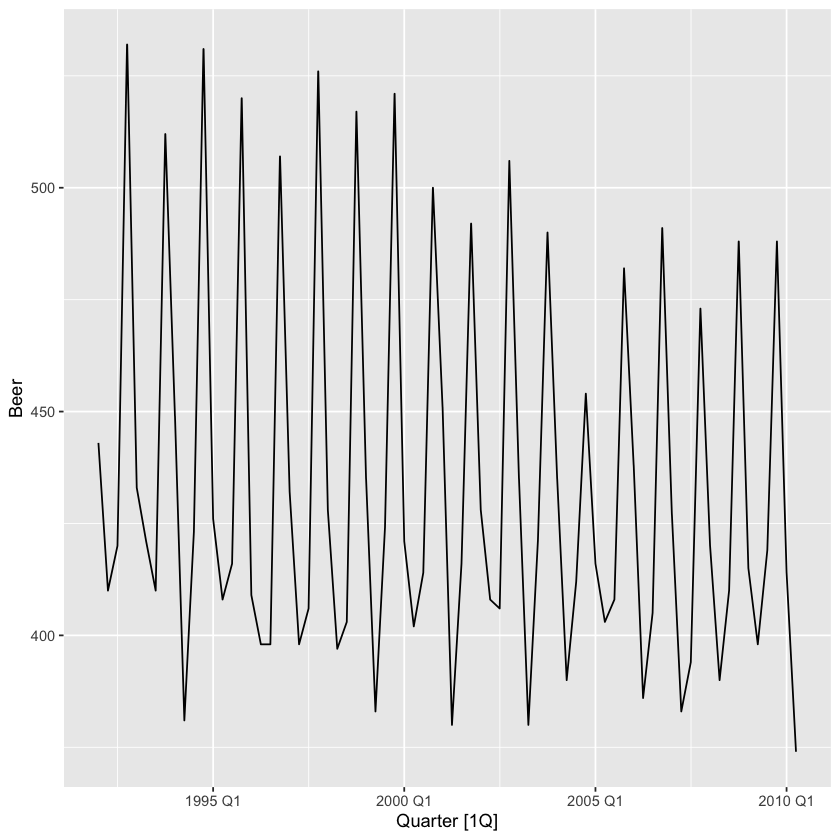

In [8]:
recent_beer <- aus_production %>%
    filter(year(Quarter) >= 1992) %>%
    select(Beer)

autoplot(recent_beer, Beer)

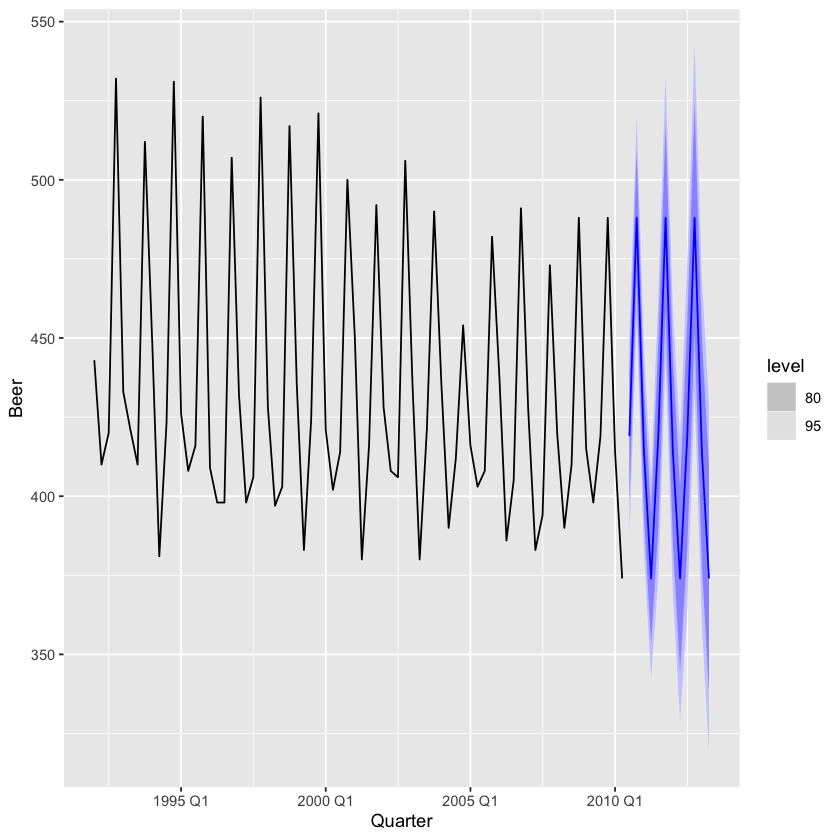

In [9]:
fit <- recent_beer %>%
    model(SNAIVE(Beer))

fit %>%
    forecast(h = "3 years") %>%
    autoplot(recent_beer)

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

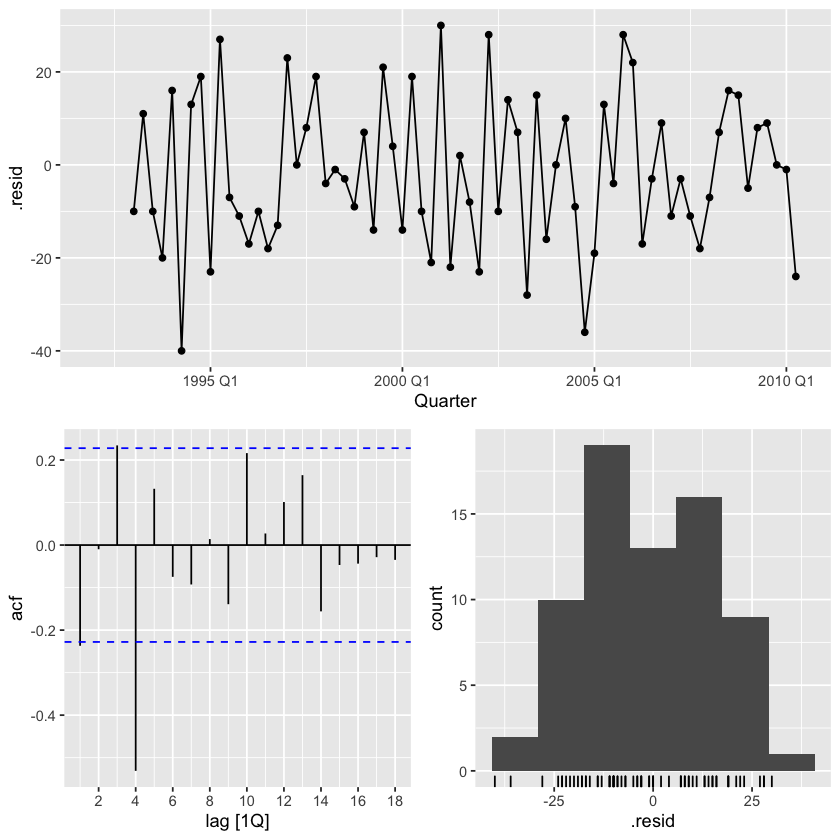

In [10]:
fit %>% gg_tsresiduals

In [14]:
augment(fit) %>% features(.innov, ljung_box, lag=10, dof=4)

.model,lb_stat,lb_pvalue
SNAIVE(Beer),37.79352,1.232743e-06
